## EA movie recommendation predict

In today’s technology driven world, recommender systems are socially and
economically critical for ensuring that individuals can make appropriate choices
surrounding the content they engage with on a daily basis. 
 
One application where this is especially true surrounds movie content recommendations; where intelligent
algorithms can help viewers find great titles from tens of thousands of options.

Recommender Systems are a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business.



![gif](https://www.dropbox.com/scl/fi/uwat4bbydmqff5gcuynf8/palesagif.jpg?rlkey=i6knwbd41zwftc41eaa7iokhk&dl=1)

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [11]:
# Install packages here
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp
import time
import ast

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(15, 8)})
%matplotlib inline
from io import BytesIO
from PIL import Image


#Wordcloud
from PIL import Image
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Packages for modeling
!pip install scikit-surprise
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import KNNBaseline, SVDpp, BaselineOnly, KNNWithMeans, CoClustering, SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
import heapq
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import requests
import random

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [52]:
train = pd.read_csv('train.csv') #loading training data

In [53]:
test = pd.read_csv('test.csv') #loading test data

In [54]:
movies = pd.read_csv('movies.csv')

In [55]:
genome_scores = pd.read_csv('genome_scores.csv') #loading training data

In [56]:
imdb_data = pd.read_csv('imdb_data.csv') #loading genome scores data

In [57]:
genome_tags = pd.read_csv('genome_tags.csv') #loading genome tags data

In [58]:
links = pd.read_csv('links.csv') #loading links data

In [59]:
tags = pd.read_csv('tags.csv') #loading tags data

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [60]:
# defining a function that will inspect each DataFrame

def df_inspect(df):
    print("Dataframe Info:")
    print(df.info())
    print("\n")
    print("Columns with Null Values:")
    print(df.isnull().sum())

In [61]:
train.head() #revealing training data

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [62]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [63]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [65]:
df_inspect(movies)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB
None


Columns with Null Values:
movieId    0
title      0
genres     0
dtype: int64


In [66]:
imdb_data

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion
...,...,...,...,...,...,...
27273,131254,Franz Dinda|Florian Lukas|Axel Stein|Kailas Ma...,Carsten Funke,85.0,NaN,man wrapped in a towel|man wears a thong|male ...
27274,131256,Rick Kavanian|Axel Stein|Eva Habermann|Christo...,Matthias Dinter,83.0,"DEM5,800,000",ski|ski resort|ampersand in title|drink in title
27275,131258,Nam-gil Kim|Ye-jin Son|Hae-Jin Yoo|Kyeong-yeon...,Seong-il Cheon,130.0,NaN,pirate|sword fight|korea|bandit
27276,131260,Martti Suosalo|Ilkka Koivula|Vexi Salmi|Riitta...,Timo Koivusalo,102.0,NaN,friend|friendship|television show|restaurant


In [67]:
df_inspect(imdb_data)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB
None


Columns with Null Values:
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


In [68]:
genome_tags

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
...,...,...
1123,1124,writing
1124,1125,wuxia
1125,1126,wwii
1126,1127,zombie


In [69]:
df_inspect(genome_tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB
None


Columns with Null Values:
tagId    0
tag      0
dtype: int64


In [70]:
genome_scores

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
...,...,...,...
15584443,206499,1124,0.11000
15584444,206499,1125,0.04850
15584445,206499,1126,0.01325
15584446,206499,1127,0.14025


In [71]:
df_inspect(genome_scores)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB
None


Columns with Null Values:
movieId      0
tagId        0
relevance    0
dtype: int64


In [72]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
62418,209157,6671244,499546.0
62419,209159,297986,63407.0
62420,209163,6755366,553036.0
62421,209169,249603,162892.0


In [73]:
df_inspect(links)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB
None


Columns with Null Values:
movieId      0
imdbId       0
tmdbId     107
dtype: int64


df_links[''].mean

In [74]:
tags

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455
...,...,...,...,...
1093355,162521,66934,Neil Patrick Harris,1427311611
1093356,162521,103341,cornetto trilogy,1427311259
1093357,162534,189169,comedy,1527518175
1093358,162534,189169,disabled,1527518181


In [75]:
df_inspect(tags)

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB
None


Columns with Null Values:
userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [76]:
#Displays info about the columns whether they are numerical or not
train.info()
print("\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [77]:
train.isnull().sum()
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [78]:
train.shape

(10000038, 4)

In [79]:
test.shape

(5000019, 2)

In [39]:
unique_users = df_train['userId'].nunique()
print(f'unique users is; is {unique_users}')

unique users is; is 162541


In [80]:
N  = 100
top_users = df_train['userId'].value_counts().nlargest(100).index



<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Feature engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In [42]:
df_links['tmdbId'].fillna(0, inplace = True)

In [43]:
unique_movies = df_train['movieId'].nunique()
print(f'unique movies is; is {unique_movies}')

unique movies is; is 48213


In [44]:
train_movies_combo = df_train.merge(df_movies, on = 'movieId', how = 'left') 

In [45]:
train_movies_combo

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,106343,5,4.5,1206238739,Father of the Bride Part II (1995),Comedy
2,146790,5459,5.0,1076215539,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
3,106362,32296,2.0,1423042565,Miss Congeniality 2: Armed and Fabulous (2005),Adventure|Comedy|Crime
4,9041,366,3.0,833375837,Wes Craven's New Nightmare (Nightmare on Elm S...,Drama|Horror|Mystery|Thriller
...,...,...,...,...,...,...
10000033,136395,99114,5.0,1521235092,Django Unchained (2012),Action|Drama|Western
10000034,140078,553,3.0,1002580977,Tombstone (1993),Action|Drama|Western
10000035,154807,56782,4.0,1227674807,There Will Be Blood (2007),Drama|Western
10000036,85805,327,4.0,1479921530,Tank Girl (1995),Action|Comedy|Sci-Fi


In [46]:
N  = 5
top_movies = train_movies_combo['title'].value_counts().nlargest(5).index

In [47]:
movie_frequencies = train_movies_combo['title'].value_counts()



In [48]:
movie_frequencies

Shawshank Redemption, The (1994)                                 32831
Forrest Gump (1994)                                              32383
Pulp Fiction (1994)                                              31697
Silence of the Lambs, The (1991)                                 29444
Matrix, The (1999)                                               29014
                                                                 ...  
The Green, Green Grass of Home (1982)                                1
Bella Mafia (1997)                                                   1
Sniper (1932)                                                        1
Shinobi No Mono 3: Resurrection (Shin shinobi no mono) (1963)        1
Elia Kazan: A Director's Journey (1995)                              1
Name: title, Length: 48151, dtype: int64

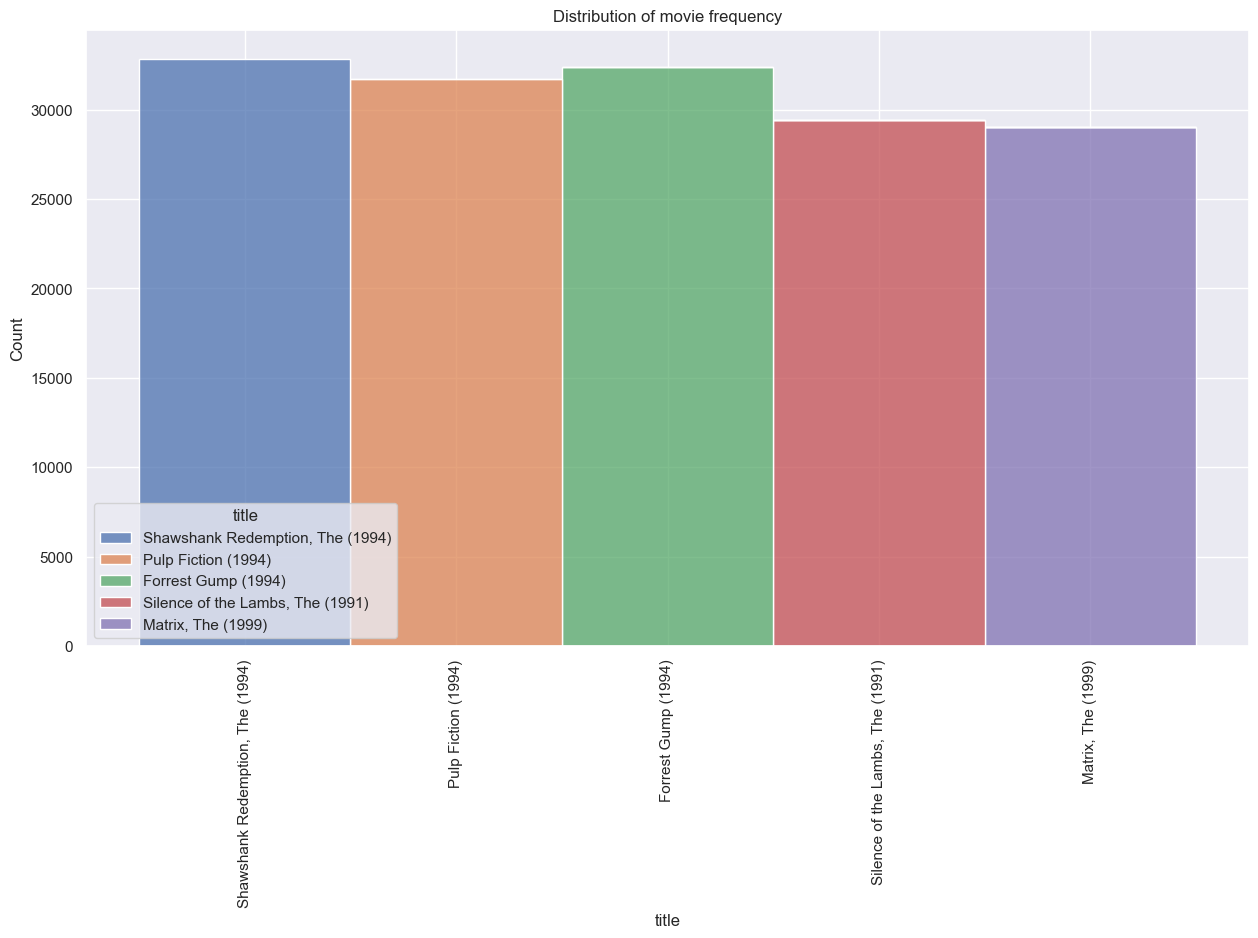

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_movies_combo is your DataFrame
movie_frequencies = train_movies_combo['title'].value_counts()

# Sort movies based on frequency in descending order
sorted_movies = movie_frequencies.index

# Select only the top movies based on your criteria (top_movies)
top_movies = sorted_movies[:N]  # Replace N with the desired number of top movies

# Create the histogram with the sorted movie order
plt.figure(figsize=(15, 8))
sns.histplot(train_movies_combo[train_movies_combo['title'].isin(top_movies)], bins=50, x='title', hue='title', multiple='stack')
plt.title('Distribution of movie frequency')
plt.xlabel('title')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


**MovieLens Rating Distribution**

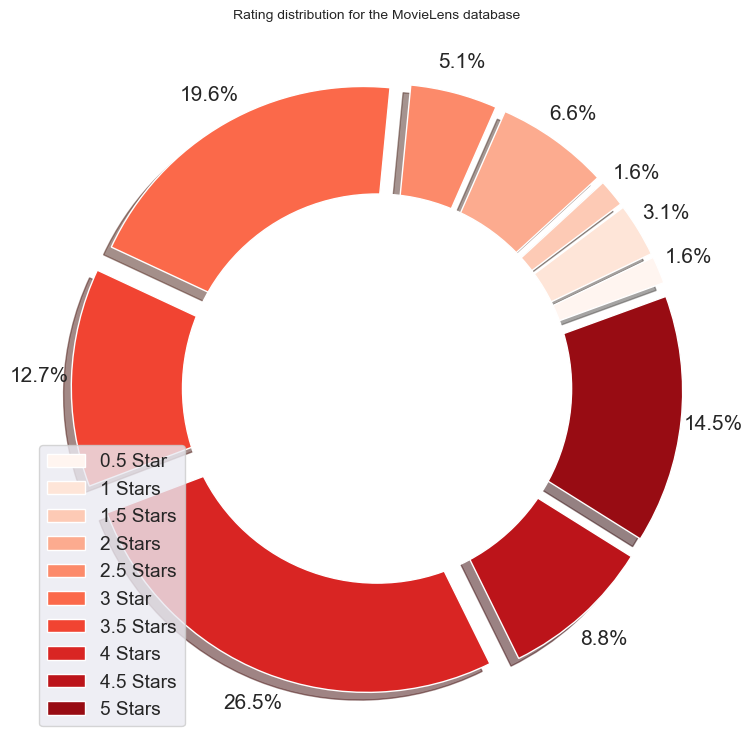

In [81]:
# Merge train with movies to join movie titles and ratings
ratings = train.merge(movies, on='movieId', how='inner')
ratings.drop('timestamp', axis=1, inplace=True)

# Count how many ratings are in each category (1 star, 2 star, ect)
grouped = pd.DataFrame(ratings.groupby(['rating'])['title'].count())
grouped.rename(columns={'title':'rating_count'}, inplace=True)

# Creating plots
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(122)

# Create colour palette
labels = ['0.5 Star', '1 Stars', '1.5 Stars', '2 Stars', '2.5 Stars', '3 Star', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels))
                                 for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create pie chart
pie = ax.pie(grouped['rating_count'],
                 autopct='%1.1f%%',
                 shadow=True,
                 startangle=20,
                 pctdistance=1.115,
                 explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1))

# Turn pie chart into a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display donut plot with legend
plt.legend(pie[0], labels, loc="lower left")
ax.set_title('Rating distribution for the MovieLens database\n', fontsize=10)
plt.tight_layout()
plt.show()

**Observations:**

4 Star ratings make up the largest portion of ratings in the MovieLens dataset, accounting for 26.5% of the overall ratings.
5 star ratings make up 14.5% of the overall ratings (3rd largest portion)
0.5 star ratings account for the smallest portion of the ratings at a mere 1.6%
Ratings between 2 and 0.5 stars account for 12.9%

**Distribution of average ratings**

Let's take a look at the average rating of each movie.

These stats could be misleading, though: A movie can make it to the top of the list even if only a single user has given it five stars. Normally, a movie that's really a good one gets a higher rating by a large number of users. Keeping this in mind we will record the number of ratings each film has received.

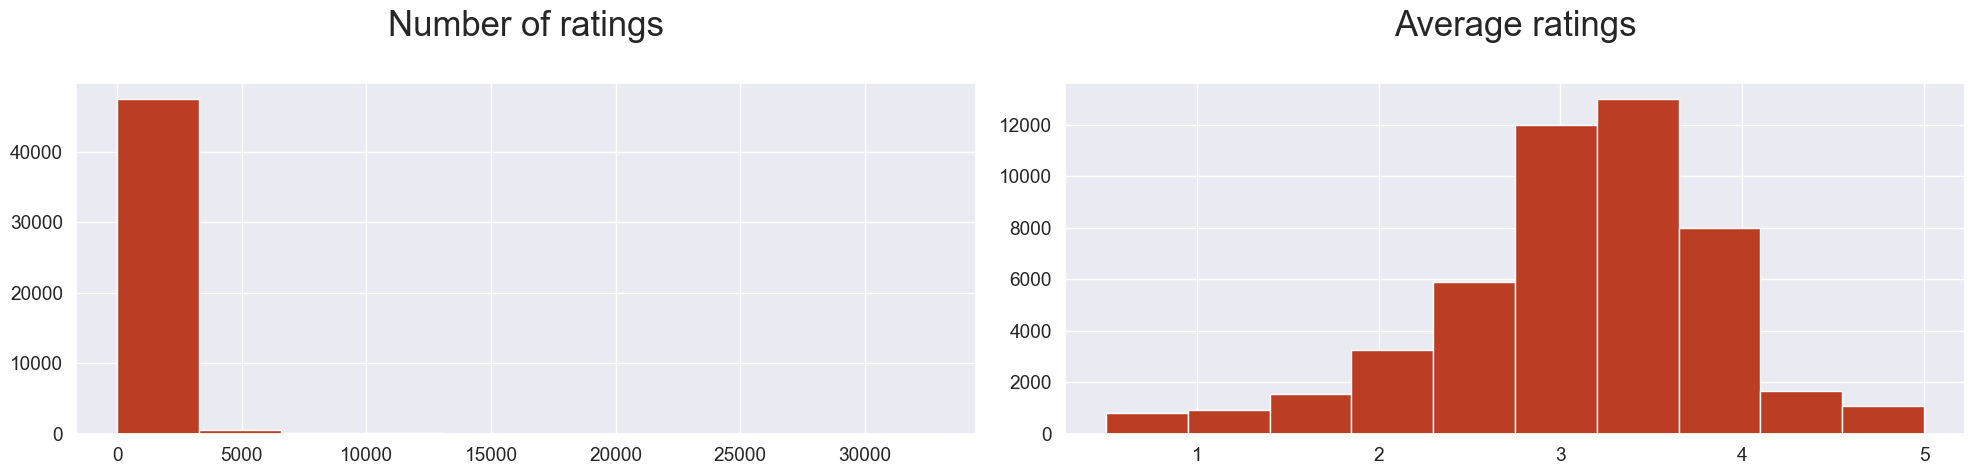

In [83]:
# Determine the average rating and number of ratings for each movie
ratings_mean_count = pd.DataFrame(ratings.groupby(['title'])[['rating']].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count())
ratings_mean_count['popularity'] = pd.DataFrame(ratings.groupby(['title'])['rating'].count()*ratings.groupby(['title'])['rating'].mean())

# Create a plot of the number of ratings
f, axarr = plt.subplots(1,2, figsize=(20,5))
axarr[0].hist(ratings_mean_count['rating_counts'], bins=10, color='#bb3d23')
axarr[0].set_title('Number of ratings\n', fontsize=25)

# Create a plot showing the average ratings distribution
axarr[1].hist(ratings_mean_count['rating'], bins=10, color='#bb3d23')
axarr[1].set_title('Average ratings\n', fontsize=25)

# Display both plots
plt.tight_layout()
plt.show()

**Observations:**

 Most of the movies have received less than 2500 ratings. While the number of movies having more than 5000 ratings is very low.

The ratings follow a normal distribution that is slightly skewed to the right. It seems like users are generally generous with their ratings.

The mean rating is around 3

**Year Released**

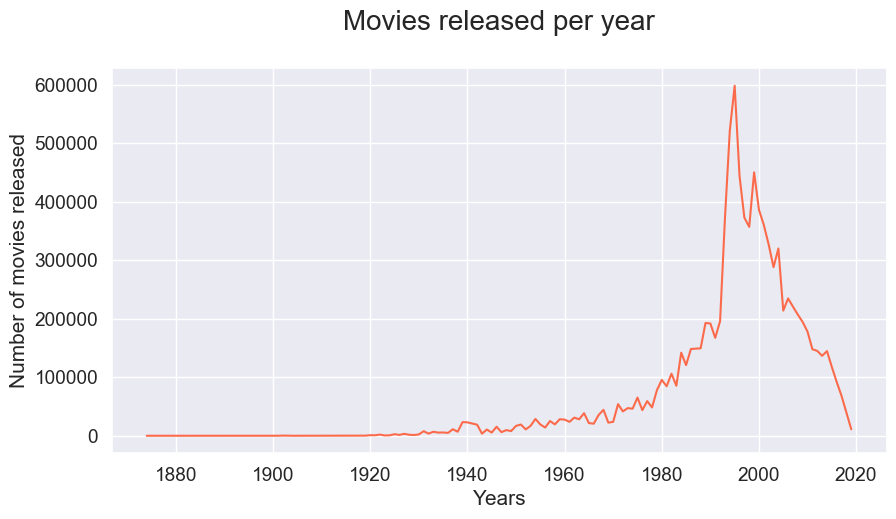

In [82]:
# Extract the release year fron the movie titles
ratings['release_year'] = ratings.title.map(lambda x: re.findall('\d\d\d\d', x))
ratings.release_year = ratings.release_year.apply(lambda x: np.nan if not x else int(x[-1]))
years =  pd.DataFrame(ratings.groupby(['release_year'])['title'].count())
years.rename(columns={'title':'movies released'}, inplace=True)

# Plot the number of movies released per year
plt.figure(figsize=(10,5))
plot = sns.lineplot(data=years, dashes=False, legend=False, palette='Reds_r')

# Add figure labels
plt.xlabel('Years', fontsize=15)
plt.ylabel('Number of movies released', fontsize=15)
plt.title('Movies released per year\n', fontsize=20)

plt.show()

**Observations:**

This dataset contains movie ratings and movie specific data dating back 50 years.

There was a huge spike in movie production between 1990 and 2000 which has slowed down significantly in the last few years.

**Greatest hits: most popular movies**

Popularity will be determined as the product of the average rating and the number of ratings a film has received.

# Extract and display the 10 most popular films in the dataset
ratings_mean_count = ratings_mean_count.sort_values(by='popularity', ascending=False).head(15)
ratings_mean_count.head(15)

from IPython.display import Image

Image("filename=Movies.jpeg")

**Observations:**

We see some really good movies like the Martrix, Star Wars and the Lord of the Rings in the top 15.

The above list supports our point that good movies normally receive both more and higher ratings

 An interesting thing to note is that all the movies in the top 10 are older, with none of the movies more recent than 1999.

This just could be because these movies have been around longer and have been rated more as a result

**Rating distribution: Shawshank Redemption**

Let's take a closer look at how the ratings for the most popular movie are distributed

In [ ]:
# Extract Shawshank Redemption ratings
top = ratings[ratings['title'] == 'Shawshank Redemption, The (1994)'].copy()

# Group all 2 star and lower ratings together
top.loc[(top.rating == 0.5) | (top.rating == 1) | (top.rating == 1.5), 'rating'] = 2

# Count how many ratings are in each category: 1 star, 2 star, etc.
grouped = pd.DataFrame(top.groupby('rating')['title'].count())
grouped.rename(columns={'title': 'rating_count'}, inplace=True)

# Create the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create the color palette
labels = ['2 Stars and less', '2.5 Stars', '3 Stars', '3.5 Stars', '4 Stars', '4.5 Stars', '5 Stars']
theme = plt.get_cmap('Reds')
ax.set_prop_cycle("color", [theme(1. * i / len(labels)) for i in range(len(labels))])
sns.set(font_scale=1.25)

# Create the pie chart
explode = (0.1,) * len(grouped)
pie = ax.pie(grouped['rating_count'],
             autopct='%1.1f%%',
             shadow=True,
             startangle=10,
             pctdistance=1.115,
             explode=explode)

# Turn the pie chart into a donut chart
centre_circle = plt.Circle((0, 0), 0.30, fc='white')
fig.gca().add_artist(centre_circle)

# Display the donut chart with a legend
ax.set_title('Rating distribution for the Shawshank Redemption\n', fontsize=15)
plt.legend(pie[0], labels, loc="lower left")
plt.tight_layout()
plt.show()

**Observations:**

48.9% of the ratings received were 5 stars

An impressive 86.4% of the ratings were between 5 and 4 stars

Only 2% of the ratings received were 2 stars or less

This was clearly a fan favourite

**Movie genres**

How many different genres are represented in the dataset and how are they distributed?

In [ ]:
movies_genres = pd.DataFrame(movies[['movieId', 'genres']], columns=['movieId', 'genres'])

# Create expanded dataframe where each movie-genre combination is in a separate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

In [ ]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='icefire_r')
plt.show()

**Observations:**

There are 19 unique genres

5062 films have no genre listed which accounts for 5% of the films in the dataset

Majority of the films fall into the drama, comedy and thriller genres.

Dramas account for 23%

Comedies makes up 15% of the films

8% of the films fall into the thriller genre

The Imax genre accounts for the smallest portion of the films in the dataset at less than 1% since this is a relatively new genre and the dataset goes back 50 years

7.1.3. How many movies were released in each year (1990-2019)?

In [ ]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don’t conflict with movies that have years in their titles
movies['year'] = movies['title'].str.extract("(\(\d\d\d\d\))",expand=False)
#Removing the parentheses
movies['year'] = movies['year'].str.extract("(\d\d\d\d)",expand=False)
#Removing the years from the ‘title’ column
movies['title'] = movies['title'].str.replace("(\(\d\d\d\d\))", "")
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())

In [ ]:
pd.to_datetime(movies.year, format='%Y')

In [ ]:
year_df = pd.DataFrame(movies.groupby('year')['title'].count()).reset_index()
year_df.rename(columns={'title': 'num_of_titles'}, inplace=True)
year_df = year_df.sort_values(by='year', ascending=False)
year_df

In [ ]:
# plot the highest rated movies
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=year_df[0:30],y='num_of_titles',x='year',palette = sns.color_palette('icefire_r', 30))
ax.set(ylabel="Number of Movies",
       xlabel="Year")
ax.title.set_text('Amount of movies released per year')
sns.despine(left=True, bottom=True)

***Observations***

We observed a gradual incline in the number of movies released in 2 decades.

There are a few reasons for the increase in the number of movies released between 1990 and 2019. One major reason is the advancement of technology, which has made it cheaper and easier to produce and distribute films. Additionally, the growth of streaming services like Netflix and Amazon Prime has created a larger market for independent and niche films. Additionally, globalization and the increasing demand for entertainment in developing countries also played a role in the increase of movie production. Finally, the increasing popularity of franchises and sequels in Hollywood also contributed to the increase in the number of films released.

**Trends in genre popularity**

The following figure shows the number of ratings movies from each genre have received over the last 50 years.

In [ ]:
def most_watched(input_df):
    """"
    This function creates a plot showing the popularity of each genre
    over the last 50 years.

    Input: input_df
           datatype: DataFrame

    Output: None

    """
    # Create a copy of the input dataframe and merge it to the movies dataframe
    df = input_df.copy()
    df = df.merge(movies, on='movieId', how='left')

    # Create an empty dataframe
    b = pd.DataFrame()

    # Convert the 'genres' column to string format
    df['genres'] = df['genres'].apply(lambda x: str(x))

    # Extract the timestamps and genres
    timestamps = [timestamp for timestamp in df.timestamp]
    all_genres = set(','.join([genres.replace('|', ',') for genres in df.genres]).split(','))

    # Get the number of ratings for each genre for each year since 1970
    for index, genre in enumerate(all_genres):
        a = pd.Series([int((timestamps[i] / 31536000) + 1970) for i, x in enumerate(df.genres) if genre in x])
        a = a.value_counts()
        b = pd.concat([b, pd.DataFrame({genre: a})], axis=1)

    # Plot the trends for each genre on the same line graph
    plt.figure(figsize=(10, 10))
    plot = sns.lineplot(data=b, dashes=False)

    # Add plot labels
    plt.title('Trends in genre popularity', fontsize=20)
    plt.xlabel('Years', fontsize=15)
    plt.ylabel('Number of ratings', fontsize=15)

    plt.show()

# Assuming you have defined the 'movies' DataFrame and 'train' DataFrame
most_watched(train)


**Observations:**

We see a similar trend for most genres with a huge spike in 2015, this could be because of an increase in users and/or an increase in the number of movies released.

We also observe a sharp spike in 1996 in the number of movies rated in each genre followed by a huge dip in the following two years...Have to find the why.

It is also worth noting that the count of movie ratings has gone down across the boards in the last 5 years

In [ ]:
**Plot keywords**

Lets have a look at the most frequently occuring plot keywords in the movielens dataset

In [ ]:
#First lets create a corpus of all our plot keywords

plot_words = []

# Converting each keyword to lowercase and append them to our corpus
for keywords in imdb_data["plot_keywords"]:
    if isinstance(keywords, list):
        for word in keywords:
            cleaned_word = str(word).lower()  # Convert the keyword to lowercase
            plot_words.append(cleaned_word)

# Converting our list to a string
plot_words = " ".join(plot_words)


In [ ]:
#Creating a list of our own stop words
plot_stopwords = ['character', 'title', 'reference', 'name', 'in', 'based', 'directed'] + list(STOPWORDS)

#Creating our word cloud
title_wordcloud = WordCloud(stopwords=plot_stopwords, background_color='black',
                            max_words=100, height=2000, width=4000).generate(plot_words)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Plot Keywords", fontsize=30)
plt.axis('off')
plt.show()


**Observations:**

Words that stand out occur more frequently in the dataset.

One of the words that stands out is F-rated which is a feminist classification system designed to highlight films that are written, directed or starring women

We see a few comedy related keywords like 'Comedy', 'stand up special', 'stand up comedy'

Documentary, biography and conspiracy are popular keywords.

Keywords like 'Seductive', 'hot', 'sexy', 'sex scene', ect are all over the wordcloud, this is because most films, regardless of the genre seem to have some element of sex appeal.

**Directors**

A film director controls a film's artistic and dramatic aspects and visualizes the screenplay while guiding the technical crew and actors in the fulfilment of that vision. The director has a key role in choosing the cast members, production design and all the creative aspects of filmmaking.

Let's have a closer look at the directors that appear frequently in our dataset. They must be doing something right.

In [ ]:
# Generate a WordCloud using the movie directors

# Concatenate all the directors' names into a single string
directors_text = ' '.join(imdb_data['director'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(directors_text)

# Plot the WordCloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Movie Directors\n', fontsize=25)
plt.show()


**Observations:**

Our intuition was right, immediately we see some big names in the film industry jumping out at us

Stephen King and Shakespeare? Well.. It's more likely that these films were based on their work

Woody Allen is an American director, writer, actor, and comedian whose career spans more than six decades and multiple Academy Award-winning movies

Tyler Perry has directed some amazing films like Acrimony and the Madea films. He now has his own motion picture studio, 'Tyler Perry Studios'

Luc Paul Maurice Besson is a French film director, screenwriter, and producer. He directed or produced the films Subway, The Big Blue, and La Femme Nikita. Besson is associated with the Cinéma du look film movement

**Actors**

I'm sure we all have certain actors we feel can do no wrong and we just love watching. The film cast will definitely have an influence on how much you enjoy or how highly you rate a movie. I for one love everything Taraji P. Henson touches.

In [ ]:
#First lets create a corpus of all our actors

actor_corpus = []

#We go through all our actors in the df_imdb column and if it isnt a None value, we convert it to lowercase and append it to
#our corpus
for title_cast in imdb_data["title_cast"]:
    if title_cast is not None:
        for cast in title_cast:
            actor_corpus.append(re.sub("\s+" , "", cast).lower())

#Converting our list to a string
actor_corpus = " ".join(actor_corpus)

#These are the stopwords we don't want to include in our word cloud
actor_stopwords = ['none', ' none', 'none ', 'nan', ' nan', 'nan ', 'j', ' j', 'j ', 'jean', ' jean', 'jean ', 'seefullsummary',\
                ' seefullsummary', 'seefullsummary '] + list(STOPWORDS)


#Creating our word cloud
title_wordcloud = WordCloud(stopwords=actor_stopwords, background_color='black', max_words=100,
                            height=2000, width=4000).generate(actor_corpus)

# Plot the wordcloud
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.title("Top 100 Most Common Cast", fontsize=30)
plt.axis('off')
plt.show()


**Observations:**

Tom Hanks: An American actor and filmmaker. Known for both his comedic and dramatic roles, Hanks is one of the most popular and recognizable film stars worldwide, and is widely regarded as an American cultural icon.

Ben Stiller: Throughout his career he has written, starred in, directed, or produced more than 50 films including The Secret Life of Walter Mitty, Zoolander, The Cable Guy and There's Something About Mary.

Eddie Murphy and Chris Rock are both successful comedians turned actors who have starred in numerous films throughout their careers

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---